In [133]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import scipy.ndimage

from scipy.ndimage.interpolation import zoom

from matplotlib import font_manager 
font_manager.findfont('Times New Roman') 
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 

with h5py.File('/Users/gmurphy/Documents/results/MRI-258-064+0-SPE_beta_z=1600,iso,OA/usr000000.h5','r') as hf0:
    vh=hf0.get('velocity') 
    vy0=(np.squeeze(v[:,:,:,1]))

#with h5py.File('/Users/gmurphy/Documents/results/MRI-258-064+0-SPE_beta_y=1600,iso,OA/usr790000.h5','r') as hf:
with h5py.File('/Users/gmurphy/Documents/results/MRI-258-064+0-SPE_beta_z=1600,iso,OA/usr790000.h5','r') as hf:
#with h5py.File('/Users/gmurphy/Documents/results/MRI-258-064+0-SPE_beta_z=1600,iso,OA,NVF=0.06/usr790000.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    dens = hf.get('density')
    den = np.array(dens)
    bh=hf.get('magnetic_field')   
    vh=hf.get('velocity')   
    b=bh.value
    v=vh.value
    rho=(np.squeeze(den[:,:,:] ))
    vx=(np.squeeze(v[:,:,:,0]))
    vy=(np.squeeze(v[:,:,:,1]))-vy0
    vz=(np.squeeze(v[:,:,:,2]))
    bx=(np.squeeze(b[:,:,:,0]))
    by=(np.squeeze(b[:,:,:,1]))
    bz=(np.squeeze(b[:,:,:,2]))

    
#print (den.shape)
#print (v.shape)

#print (de2.shape)
#print (vx.shape)

sl=64
de2d= np.log10(np.transpose((np.squeeze(de2[sl,:, :]))))
vx2d= np.transpose(np.squeeze(vx[sl,:,:]))
vy2d= np.transpose(np.squeeze(vy[sl,:,:]))
vz2d= np.transpose(np.squeeze(vz[sl,:,:]))
bx2d= np.transpose(np.squeeze(bx[sl,:,:]))
by2d= np.transpose(np.squeeze(by[sl,:,:]))
bz2d= np.transpose(np.squeeze(bz[sl,:,:]))

nz=512
nz2=math.floor(nz/2)
nz34=math.floor(nz*3/4)
print(nz34)

b2=vx**2+vy**2+vz**2
#b2=bx**2+by**2+bz**2

b2sl= np.transpose(np.squeeze(b2[:,sl,:]))
bm=np.transpose(np.squeeze(b2[:,:,nz2]))
bt=np.transpose(np.squeeze(b2[:,:,nz34]))
#print (de2d.shape)
#print (vx2d.shape)

    
#plt.imshow((de2d))









List of arrays in this file: 
 KeysViewWithLock(<HDF5 file "usr790000.h5" (mode r)>)
384


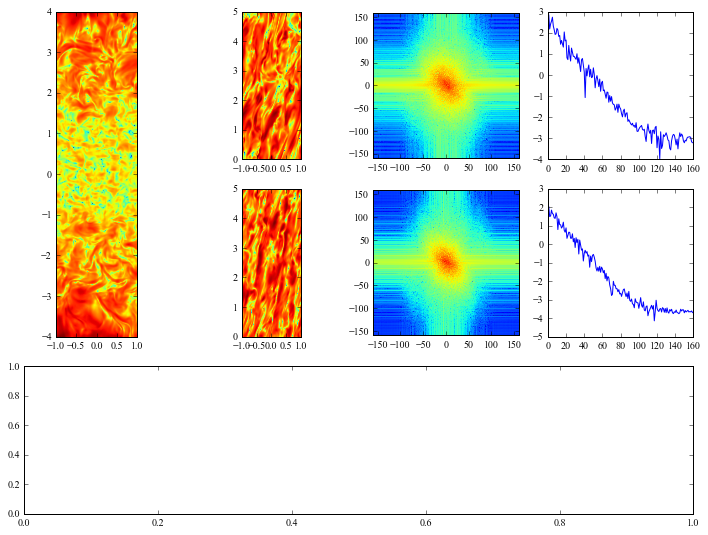

In [134]:
plt.rcParams['image.cmap'] = 'jet'  # change default colormap
#plt.rcParams['image.cmap'] = 'gray'  # change default colormap


def logabsfft(x):
    return (np.log10(np.abs(np.fft.fftshift(np.fft.fft2(x)))))

plt.figure( figsize=(12, 9))
ax1 = plt.subplot2grid((3,4), (0,0), rowspan=2)
ax1 = plt.imshow(np.log10(b2sl), extent=[-1,1,-4,4])
#ax2 = plt.subplot2grid((3,3), (1, 0))
ax3 = plt.subplot2grid((3,4), (0, 1))
ax3 = plt.imshow(np.log10(bt), extent=[-1,1,0,5])
ax4 = plt.subplot2grid((3,4), (1, 1))
ax4 = plt.imshow(np.log10(bm), extent=[-1,1,0,5])

bt2=zoom(bt, [1,2.5])
ax5 = plt.subplot2grid((3,4), (0, 2))

logabsfftbt2=logabsfft(bt2)
ax5 = plt.imshow(logabsfft(bt2), extent=[-160,160,-160,160])

bm2=zoom(bm, [1,2.5])
logabsfftbm2=logabsfft(bm2)

ax6 = plt.subplot2grid((3,4), (1, 2))
ax6 = plt.imshow(logabsfftbm2, extent=[-160,160,-160,160])


ax7 = plt.subplot2grid((3,4), (0, 3))

x0, y0 = 160, 160 # These are in _pixel_ coordinates!!
x1, y1 = 320, 320
num = 160
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(logabsfftbt2, np.vstack((x,y)))

ax7=plt.plot(zi)

ax8 = plt.subplot2grid((3,4), (1, 3))
zi = scipy.ndimage.map_coordinates(logabsfftbm2, np.vstack((x,y)))

ax8=plt.plot(zi)

ax9 = plt.subplot2grid((3,4), (2,0), colspan=4)


(21242817,)
0.0205953
(99,)
(100,)
(100,)


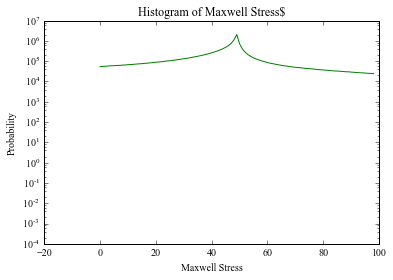

In [138]:
maxw=bx*by/rho/1e-4

max2=np.squeeze(np.ravel(maxw))
print (max2.shape)
print  (np.max(max2))

bins=np.linspace(-1e-3,1e-3, 100)
hist, bin_edges=np.histogram(max2, bins=bins )

print (hist.shape)
print (bins.shape)
print (bin_edges.shape)


import matplotlib.mlab as mlab

num_bins=160
# the histogram of the data
n, bins, patches = plt.hist(max2, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)
#plt.semilogy(bins,  'r--')
plt.xlabel('Maxwell Stress')
plt.ylabel('Probability')
plt.title(r'Histogram of Maxwell Stress$')




plt.semilogy( hist)
#ax1=plt.plot(arr)
